# Clustering Crypto

In [58]:
# Initial imports
import pandas as pd
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


### Deliverable 1: Preprocessing the Data for PCA

In [84]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('Resources/crypto_data.csv')


crypto_df= crypto_df.drop("Unnamed: 0",axis=1)

crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,True,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [85]:
# Remove rows with at least 1 null value
crypto_df.isnull().sum()
crypto_df = crypto_df.dropna()
crypto_df.shape

(744, 6)

In [86]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [87]:
# Remove the "IsTrading" column. 

crypto_df = crypto_df.drop(columns = ["IsTrading"])
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [88]:
# Remove rows that have at least 1 null value.

crypto_df.isnull().sum()
crypto_df = crypto_df.dropna()
crypto_df.shape

(685, 5)

In [89]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df.shape


(532, 5)

In [90]:

crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


In [92]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coins_name = crypto_df['CoinName']

coins_name


0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [93]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop("CoinName", axis=1)

crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [94]:
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
9,Scrypt,PoW,6.303924e+07,84000000
10,X11,PoW/PoS,9.031294e+06,22000000
11,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethash,PoW,1.133597e+08,210000000
13,Equihash,PoW,7.383056e+06,21000000


In [105]:
crypto_df.set_index([coins_name], inplace=False)



,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CoinName,,,,
42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
Bitcoin,SHA-256,PoW,1.792718e+07,21000000
Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [106]:
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CoinName,,,,
42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
Bitcoin,SHA-256,PoW,1.792718e+07,21000000
Ethereum,Ethash,PoW,1.076842e+08,0


In [107]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
CoinName,,,,,,,,,,,,,,,,,,,,,
42 Coin,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404Coin,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EliteCoin,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bitcoin,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ethereum,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPHYR,2.000000e+09,2000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gapcoin,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beldex,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# View column names
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [111]:
# Standardize the data with StandardScaler().
X = StandardScaler().fit_transform(X)


### Deliverable 2: Reducing Data Dimensions Using PCA

In [51]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(X)
print(crypto_pca[0:5])

[[-0.34654604  0.97349907 -0.51158465]
 [-0.32988797  0.97361818 -0.51193926]
 [ 2.31417739  1.69036061 -0.64704157]
 [-0.13409567 -1.27105774  0.16697171]
 [-0.14569951 -2.03114453  0.33585187]]


In [112]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    crypto_pca,
    columns = ["PC 1", "PC 2", "PC 3"],
    index = coins_name
)
pcs_df.head(10)

,PC 1,PC 2,PC 3
CoinName,,,
42 Coin,-0.346546,0.973499,-0.511585
404Coin,-0.329888,0.973618,-0.511939
EliteCoin,2.314177,1.690361,-0.647042
Bitcoin,-0.134096,-1.271058,0.166972
Ethereum,-0.145700,-2.031145,0.335852
Litecoin,-0.176975,-1.184467,0.038070
Dash,-0.386309,1.309864,-0.550391
Monero,-0.134746,-2.130889,0.382385
Ethereum Classic,-0.144142,-2.031250,0.335844


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

c:\Users\above\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


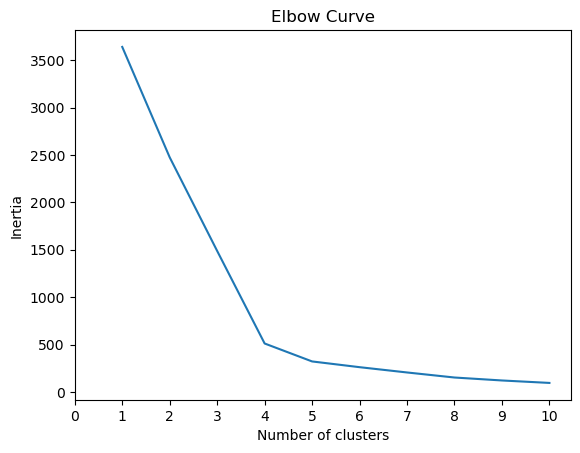

In [113]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [114]:
df_elbow.head(20)

,k,inertia
0,1,3639.129526
1,2,2474.347237
2,3,1487.061875
3,4,510.965911
4,5,321.648027
5,6,261.158220
6,7,205.331369
7,8,152.098586
8,9,120.896600
9,10,95.062574


Running K-Means with `k=4`

In [116]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=2)


# Fit the model
model.fit(df_crypto_pca)


# Predict clusters
predictions = model.predict(df_crypto_pca)

predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [22]:
df_crypto_pca.head()

,pc1,pc2,pc3
0,-0.336192,1.018774,-0.504407
1,-0.319531,1.018822,-0.504674
2,2.314197,1.652189,-0.584838
3,-0.140634,-1.299279,0.199416
4,-0.153157,-2.072177,0.321136


In [119]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1)




#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = coins_name



#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
#clustered_df["CoinName"]= coins_name
clustered_df["Class"] = predictions
# Print the shape of the clustered_df
#print(clustered_df.shape)
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
CoinName,,,,,,,,,
42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.346546,0.973499,-0.511585,NaN,0
404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.329888,0.973618,-0.511939,NaN,0
EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.314177,1.690361,-0.647042,NaN,0
Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.134096,-1.271058,0.166972,NaN,1
Ethereum,Ethash,PoW,1.076842e+08,0,-0.145700,-2.031145,0.335852,NaN,1
Litecoin,Scrypt,PoW,6.303924e+07,84000000,-0.176975,-1.184467,0.038070,NaN,1
Dash,X11,PoW/PoS,9.031294e+06,22000000,-0.386309,1.309864,-0.550391,NaN,0
Monero,CryptoNight-V7,PoW,1.720114e+07,0,-0.134746,-2.130889,0.382385,NaN,1
Ethereum Classic,Ethash,PoW,1.133597e+08,210000000,-0.144142,-2.031250,0.335844,NaN,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [131]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    data_frame = clustered_df,
    x = 'PC 1',
    y = 'PC 2',
    z = 'PC 3',
    color = 'Class',
    symbol = 'Class'
              )

fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [126]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [127]:
# Print the total number of tradable cryptocurrencies.
print(f" Total Number of Tradable Coins: {coins_name.size}")

 Total Number of Tradable Coins: 532


In [ ]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1
LTC,8.400000e-05,0.000064,Litecoin,1
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,1
ETC,2.100000e-04,0.000115,Ethereum Classic,1
ZEC,2.100000e-05,0.000007,ZCash,1


In [133]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
clustered_df.hvplot.scatter(
    x= "TotalCoinsMined", 
    y= "TotalCoinsMined",
  
)


:Scatter   [TotalCoinsMined]   (TotalCoinsMined)